In [38]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [39]:
## Q1 function
def linear_model(a,b,x):
    return a*x + np.random.uniform(0,b)

def Q1_generate(num_sample):
    x = np.linspace(3,-3,num_sample)
    y = linear_model(2,1,x)
    return x,y

( 3.0 , 6.61185289472238 )
( 2.5714285714285716 , 5.754710037579523 )
( 2.142857142857143 , 4.897567180436665 )
( 1.7142857142857144 , 4.040424323293808 )
( 1.2857142857142858 , 3.183281466150951 )
( 0.8571428571428572 , 2.326138609008094 )
( 0.4285714285714288 , 1.4689957518652372 )
( 0.0 , 0.6118528947223795 )
( -0.4285714285714284 , -0.2452899624204773 )
( -0.8571428571428568 , -1.102432819563334 )
( -1.2857142857142856 , -1.9595756767061916 )
( -1.7142857142857144 , -2.8167185338490492 )
( -2.1428571428571423 , -3.673861390991905 )
( -2.571428571428571 , -4.531004248134763 )
( -3.0 , -5.38814710527762 )


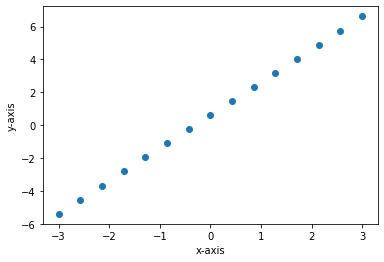

In [40]:
## Q1
x,y = Q1_generate(15)
for i in range(15):
    print("(", x[i],",", y[i],")")
    
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.scatter(x,y)

In [50]:
# Q2
def linear_model2(x):
    return 2 * x + np.random.normal(loc=0, scale=1, size=x.shape[0])

# Define the function for calculating the coefficients of the linear regression model
def linear_regression(x, y):
    # Calculate the means of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculate the slope and y-intercept of the linear model
    slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    y_intercept = y_mean - slope * x_mean

    return slope, y_intercept


# Calculate cross-validation error using 5-fold cross-validation
def cross_validation(x, y, k):
    cv_error = np.mean([
        np.mean((y[i:i+k] - linear_regression( np.concatenate((x[:i], x[i+k:])), np.concatenate((y[:i], y[i+k:]))
        )[0] * x[i:i+k] + linear_regression(np.concatenate((x[:i], x[i+k:])), np.concatenate((y[:i], y[i+k:]))
        )[1]) ** 2)
        for i in range(0, len(x), k)
    ])
    return cv_error



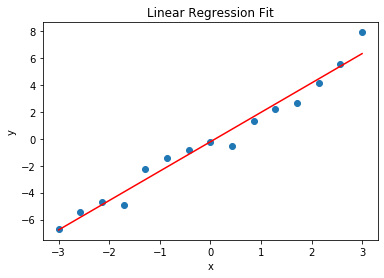

Training Error: 0.49017809305031185
Cross-Validation Error: 0.6824192588020899


In [51]:
# Q2
# Generate 15 data points with x ∈ [−3, 3]
x = np.linspace(-3, 3, 15)
y = linear_model2(x)

# Fit linear regression model
slope, y_intercept = linear_regression(x, y)

# Calculate the predicted values of y based on the linear regression model
y_pred = slope * x + y_intercept

# Calculate training error
train_error = np.mean((y - y_pred) ** 2)

cv_error = cross_validation(x, y, 5)

# Plot the data and the fitted lineS
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Print the training error and cross-validation error
print('Training Error:', train_error)
print('Cross-Validation Error:', cv_error)

In [68]:
## Q3 funtions

# Define the function for calculating the coefficients of the polynomial regression model
def polynomial_regression(x, y, degree):
    # Calculate the Vandermonde matrix for the given degree
    X = np.vander(x, degree+1, increasing=True)

    # Calculate the coefficients of the polynomial regression model using the normal equations
    coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    return coefficients

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def k_fold_cross_validation(k, x, y, degree):
    # Shuffle the data randomly
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]
    
    # Split the data into k folds
    x_folds = np.array_split(x, k)
    y_folds = np.array_split(y, k)
    
    # Initialize the cross-validation error
    cv_error = 0
    
    # Loop over each fold
    for i in range(k):
        # Set the i-th fold as the validation set, and the remaining folds as the training set
        x_val = x_folds[i]
        y_val = y_folds[i]
        x_train = np.concatenate(x_folds[:i] + x_folds[i+1:])
        y_train = np.concatenate(y_folds[:i] + y_folds[i+1:])
        
        # Fit the polynomial regression model on the training set
        x_train = np.vander(x_train, degree+1, increasing=True)
        x_val = np.vander(x_val, degree+1, increasing=True)
        theta = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
        
        # Compute the predictions on the validation set
        y_pred = x_val.dot(theta)
        
        # Compute the mean squared error between the predictions and the actual values
        fold_error = np.mean((y_pred - y_val)**2)
        
        # Add the error to the cross-validation error
        cv_error += fold_error
        
    # Compute the average cross-validation error
    cv_error /= k
    
    return cv_error

Training Error (degree 5): 0.8900
Cross-Validation Error (degree 5): 5.1022


Training Error (degree 10): 0.4456
Cross-Validation Error (degree 10): 6992.5243


Training Error (degree 14): 0.0000
Cross-Validation Error (degree 14): 23990651.3930




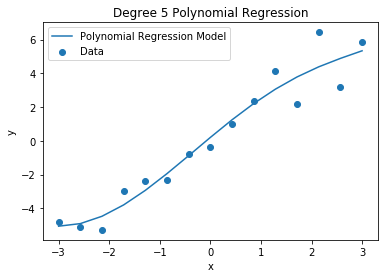

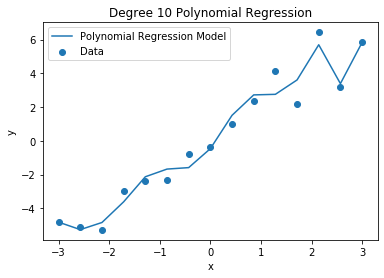

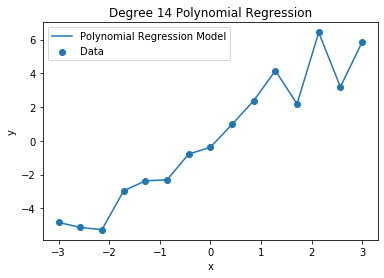

In [69]:
#Q3
x = np.linspace(-3, 3, 15)
y = linear_model2(x)

# Define the degrees to use for polynomial regression
degrees = [5, 10, 14]

# Iterate over the degrees and perform polynomial regression for each degree
for degree in degrees:
    # Fit the polynomial regression model to the data
    coefficients = polynomial_regression(x, y, degree)
    # Calculate the predicted values
    y_pred = polynomial_predict(x, coefficients)
    # Calculate the training error
    train_error = mean_squared_error(y, y_pred)
    train_errors = np.append(train_errors, train_error)
    # Calculate the cross-validation error using 5-fold cross-validation
    cv_error = k_fold_cross_validation(5, x, y, degree)
    cv_errors = np.append(cv_errors, cv_error)
   
    print(f"Training Error (degree {degree}): {train_error:.4f}")
    print(f"Cross-Validation Error (degree {degree}): {cv_error:.4f}\n")
    print("")

    # Plot the data and the polynomial regression model
    plt.figure()
    plt.scatter(x, y, label="Data")
    plt.plot(x, y_pred, label="Polynomial Regression Model")
    plt.title(f"Degree {degree} Polynomial Regression")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

In [72]:
#Q4
def model4(n_samples):
    # Generate random values of x between 0 and 1
    x = np.linspace(0, 1, n_samples)
    
    # Generate the target variable y as sin(2πx) with Gaussian noise ε∼ N(0, 0.04)
    y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.2, n_samples)
    
    return x, y


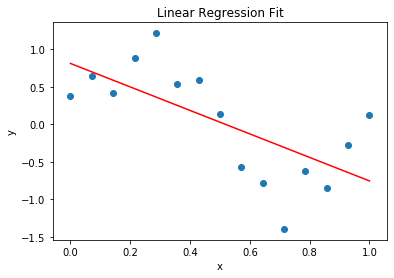

Training Error: 0.28089785581142124
Cross-Validation Error: 2.991727956077943


In [74]:
# Q4 with linear regression
# Generate the data
x, y = model4(15)
# Fit linear regression model
slope, y_intercept = linear_regression(x, y)

# Calculate the predicted values of y based on the linear regression model
y_pred = slope * x + y_intercept

# Calculate training error
train_error = np.mean((y - y_pred) ** 2)

cv_error = cross_validation(x, y, 5)

# Plot the data and the fitted line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Print the training error and cross-validation error
print('Training Error:', train_error)
print('Cross-Validation Error:', cv_error)

Training Error (degree 5): 0.0382
Cross-Validation Error (degree 5): 0.1735


Training Error (degree 10): 0.0202
Cross-Validation Error (degree 10): 704.7600


Training Error (degree 14): 0.0748
Cross-Validation Error (degree 14): 15055.1879




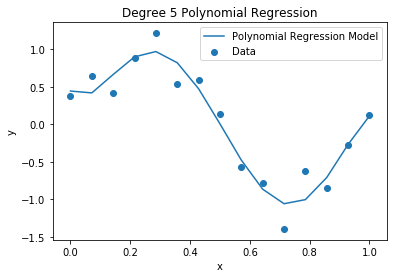

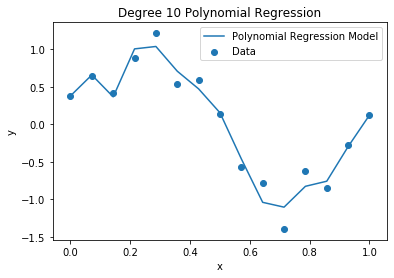

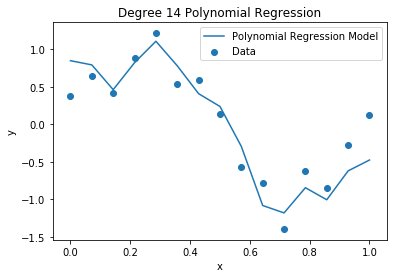

In [75]:
# Q4 with poly regression
# Define the degrees to use for polynomial regression
degrees = [5, 10, 14]

# Iterate over the degrees and perform polynomial regression for each degree
for degree in degrees:
    # Fit the polynomial regression model to the data
    coefficients = polynomial_regression(x, y, degree)
    # Calculate the predicted values
    y_pred = polynomial_predict(x, coefficients)
    # Calculate the training error
    train_error = mean_squared_error(y, y_pred)
    train_errors = np.append(train_errors, train_error)
    # Calculate the cross-validation error using 5-fold cross-validation
    cv_error = k_fold_cross_validation(5, x, y, degree)
    cv_errors = np.append(cv_errors, cv_error)
   
    print(f"Training Error (degree {degree}): {train_error:.4f}")
    print(f"Cross-Validation Error (degree {degree}): {cv_error:.4f}\n")
    print("")

    # Plot the data and the polynomial regression model
    plt.figure()
    plt.scatter(x, y, label="Data")
    plt.plot(x, y_pred, label="Polynomial Regression Model")
    plt.title(f"Degree {degree} Polynomial Regression")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

Training Error (degree 14): 0.1503
Cross-Validation Error (degree 14): 308.8500


Training Error (degree 14): 0.1895
Cross-Validation Error (degree 14): 0.1761


Training Error (degree 14): 0.0438
Cross-Validation Error (degree 14): 0.0569




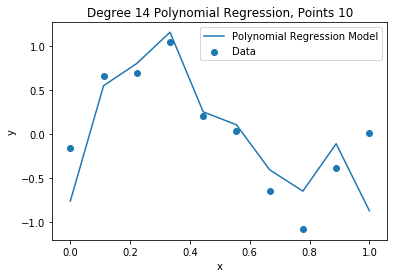

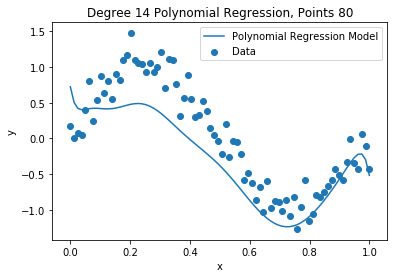

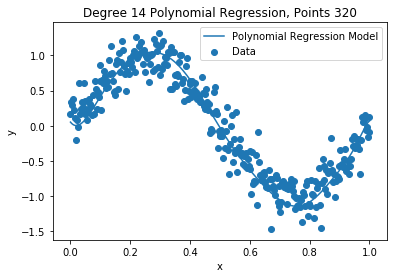

In [80]:
# Q5
# Define the degree of the polynomial regression
degree = 14

# Define the number of training data points
m_values = [10, 80, 320]


# Loop over each value of m
for i, m in enumerate(m_values):
    # Generate the training data
    x_train, y_train = model4(m)
    
    # Fit the polynomial regression model to the data
    coefficients = polynomial_regression(x_train, y_train, degree)
    # Calculate the predicted values
    y_pred = polynomial_predict(x_train, coefficients)
    # Calculate the training error
    train_error = mean_squared_error(y_train, y_pred)
    train_errors = np.append(train_errors, train_error)
    # Calculate the cross-validation error using 5-fold cross-validation
    cv_error = k_fold_cross_validation(5, x_train, y_train, degree)
    cv_errors = np.append(cv_errors, cv_error)
   
    print(f"Training Error (degree {degree}): {train_error:.4f}")
    print(f"Cross-Validation Error (degree {degree}): {cv_error:.4f}\n")
    print("")

    # Plot the data and the polynomial regression model
    plt.figure()
    plt.scatter(x_train, y_train, label="Data")
    plt.plot(x_train, y_pred, label="Polynomial Regression Model")
    plt.title(f"Degree {degree} Polynomial Regression, Points {m}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

In [81]:
# Define the regularization function
def l2_regularization(w, lambda_reg):
    return lambda_reg * np.sum(w**2)

# Define the polynomial features function
def polynomial_features(x, degree):
    X = np.zeros((len(x), degree + 1))
    for i in range(degree + 1):
        X[:, i] = x**i
    return X

# Define the ridge regression function
def ridge_regression(X_train, y_train, lambda_reg):
    n, d = X_train.shape
    I = np.eye(d)
    w = np.linalg.inv(X_train.T @ X_train + lambda_reg * I) @ X_train.T @ y_train
    return w

# Define the prediction function
def predict(X, w):
    return X @ w

# Define the mean squared error function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

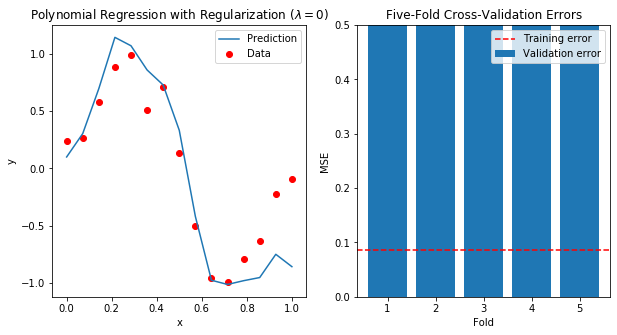

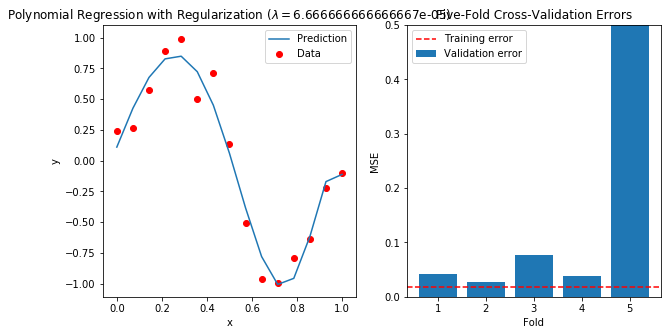

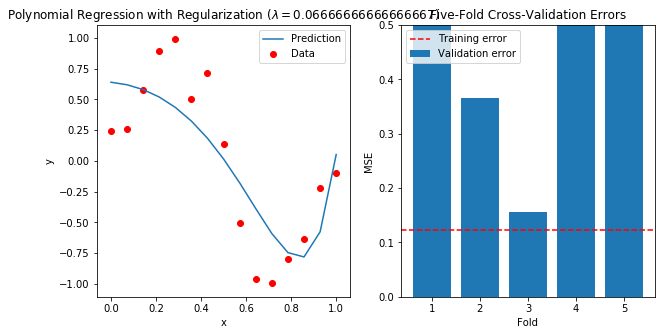

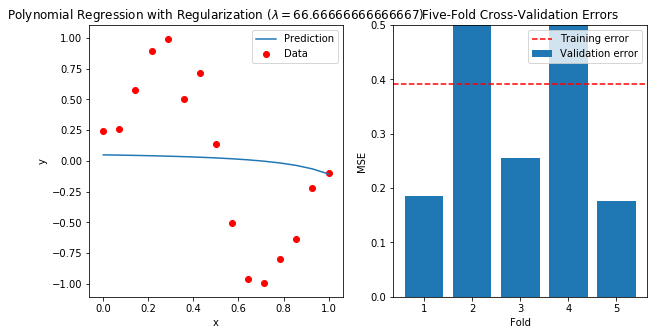

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

# Generate data
m = 15
x = np.linspace(0, 1, m)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.2, m)

# Polynomial regression with regularization
degrees = 14
lambdas = [0, 0.001/m, 1/m, 1000/m]
kf = KFold(n_splits=5)

for l in lambdas:
    # Compute polynomial features
    X = np.array([x ** d for d in range(degrees+1)]).T
    
    # Split data into training and validation sets
    validation_errors = []
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Compute weights with regularization
        I = np.identity(degrees+1)
        I[0, 0] = 0 # Do not regularize the bias term
        w = np.linalg.inv(X_train.T @ X_train + l * I) @ X_train.T @ y_train

        # Compute validation error
        y_pred = X_val @ w
        validation_error = np.mean((y_val - y_pred)**2)
        validation_errors.append(validation_error)
    
    # Compute training error
    w = np.linalg.inv(X.T @ X + l * I) @ X.T @ y
    y_pred = X @ w
    training_error = np.mean((y - y_pred)**2)

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, c='r', label='Data')
    plt.plot(x, y_pred, label='Prediction')
    plt.title('Polynomial Regression with Regularization ($\lambda=$' + str(l) + ')')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.bar(range(1, 6), validation_errors, label='Validation error')
    plt.axhline(y=training_error, color='r', linestyle='--', label='Training error')
    plt.title('Five-Fold Cross-Validation Errors')
    plt.xlabel('Fold')
    plt.ylabel('MSE')
    plt.ylim([0, 0.5])
    plt.xticks(range(1, 6))
    plt.legend()
    
    plt.show()
